# Time Series Analysis of the Number of Births in France (1946–2025)

## Final Project – Machine Learning for Time Series


---
### Authors:
- Saber Dhib  
- Arnaud Fernandes  
- Valentin Gorse  
- Sara Ben Abdelkader

### Instructor:
Course: Machine Learning for Time Series – Paris  
Study period: January 1946 – September 2025 (provisional)  
Sources: INSEE – Official monthly and annual datasets



---

## Project Title
**Time Series Analysis and Forecasting of the Number of Births in France (1946–2025): Seasonal Dynamics, Marital Correlations, and Family Transformations.**

---

## Research Question
How have the temporal dynamics of birth rates in France evolved since 1946,  
and to what extent have they been influenced by marital behavior  
and the postponement of motherhood (average age at first childbirth)?

---

## Project Objectives
- Study long-term trends and seasonal patterns in monthly birth data.  
- Identify major structural breaks (economic crises, wartime periods, COVID-19 pandemic).  
- Analyze temporal correlations between marriages and births (9–12 month lag).  
- Integrate structural changes in fertility through the average age at first childbirth.  
- Implement key time series analysis methods (STL, Fourier, ARIMA, etc.).  
- Produce short-term forecasts of French birth trends.

---

## Datasets Used
| Dataset | Source | Frequency | Period | Description |
|----------|----------|------------|-----------|--------------|
| Number of births in France | INSEE – idBank 000436391 | Monthly | 1946 – 2025 (provisional) | Number of live births recorded in metropolitan France |
| Number of marriages in France | INSEE – idBank 001641603 | Monthly | 1946 – 2025 | Number of marriages celebrated in France |
| Average age at first childbirth | INSEE – idBank 000436394 | Annual | 1901 – 2023 | Average age of women at the birth of their first child |

---

## Analytical Methodology

### 1. Data preprocessing and exploration
- Import, clean, and harmonize data frequencies.  
- Visualize temporal evolution and compute moving averages.

### 2. Decomposition and structure
- Apply STL decomposition (trend, seasonality, residual).  
- Perform Fourier transform analysis to identify dominant cycles.

### 3. Stationarity and dependencies
- Apply ADF and KPSS tests to assess stationarity.  
- Examine autocorrelation (ACF) and partial autocorrelation (PACF).

### 4. Cross-correlations
- Explore correlations between births and marriages (9–12 month lag).  
- Examine structural correlations between births and average age at first childbirth.

### 5. Modeling and forecasting
- Fit ARIMA and SARIMA models for monthly series.  
- Extend with an ARIMAX model using marriages as an exogenous variable.  
- Produce short-term forecasts (2025–2026).

### 6. Breakpoint and anomaly detection
- Use PELT or Binseg methods via the `ruptures` package to detect structural changes.

### 7. Interpretation
- Analyze results: trends, seasonality, shocks, and family behavior.  
- Discuss demographic and socio-economic implications.





---

## Working Hypotheses
1. The number of births has followed a structural downward trend since the 1970s.  
2. Births exhibit a strong annual seasonality, identifiable through Fourier and STL decomposition.  
3. There is a positive delayed correlation (around 9 months) between marriages and births.  
4. The increase in average age at first childbirth negatively impacts overall fertility.  
5. Major crises (economic, health, social) cause identifiable temporal breaks.

---

## Methods and Tools
| Domain | Methods | Tools |
|----------|-----------|--------|
| Exploration | Visualization, moving averages | pandas, matplotlib, seaborn |
| Stationarity | ADF / KPSS tests | statsmodels |
| Decomposition | STL (Loess) | statsmodels.tsa.seasonal |
| Frequency analysis | Fourier Transform (FFT) | numpy.fft |
| Correlations | ACF, PACF, Cross-correlation | statsmodels, pandas |
| Modeling | ARIMA, SARIMA, ARIMAX | statsmodels.tsa.arima |
| Break detection | PELT, Binseg | ruptures |
| Forecasting | Short-term projection | statsmodels, forecast |
| Documentation | Markdown, visualization | Jupyter Notebook |

---

## Notebook Outline
1. Introduction and background  
2. Data import and preparation  
3. Visual exploration  
4. Time series decomposition (STL)  
5. Frequency analysis (Fourier)  
6. Stationarity and ACF/PACF analysis  
7. Cross-correlations (Births ↔ Marriages)  
8. Modeling (ARIMA / SARIMA / ARIMAX)  
9. Breakpoint and anomaly detection  
10. Interpretation and conclusions



---

## Expected Deliverables
- A complete and documented notebook (exploration, modeling, forecasting).  
- Interpreted visualizations (trend, seasonality, Fourier spectrum, correlation, structural breaks).  
- A concise written synthesis (2–3 pages) including interpretation and discussion of limitations.

---

> This work aims to model and understand the evolution of French birth rates over nearly eight decades,  
> analyzing their cycles, structural breaks, and relationships with marital and family behaviors.

# I. Import

In [8]:
# ---- Core packages for data manipulation ----
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import display

# ---- Visualization (static) ----
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as stats
from statsmodels.stats.diagnostic import acorr_ljungbox

# ---- Visualization (interactive) ----
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ---- Time series analysis ----
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ---- Time series modeling ----
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ---- Statistical tests and metrics ----
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---- Structural break and anomaly detection ----
import ruptures as rpt

# ---- Frequency and spectral analysis ----
from numpy.fft import fft, fftfreq

# ---- Optional: Streamlit for future interactive dashboards ----
try:
    import streamlit as st
except ImportError:
    st = None
    print("Streamlit is not installed. You can install it using: pip install streamlit")

# ---- Visualization style and configuration ----
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_context("talk", font_scale=1.1)
sns.set_palette("muted")

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 200)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# Helper functions

def set_mpl_style():
    """
    Apply a professional, harmonized style to all Matplotlib figures.
    """
    plt.rcParams.update({
        "figure.figsize": (10, 5),
        "axes.titlesize": 15,
        "axes.labelsize": 13,
        "axes.grid": True,
        "grid.alpha": 0.4,
        "lines.linewidth": 2.0,
        "lines.solid_capstyle": "round",
        "legend.fontsize": 12,
        "font.family": "serif",
        "font.serif": "Times New Roman"
    })

set_mpl_style()


def plot_interactive(df, x_col, y_col, title, color="#003366"):
    """
    Create a clean interactive Plotly line chart.
    
    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the data to plot.
    x_col : str
        Column name to use for the x-axis.
    y_col : str
        Column name to use for the y-axis.
    title : str
        Title of the chart.
    color : str, optional
        Hex color code for the line (default is dark blue).
    """
    fig = px.line(
        df,
        x=x_col,
        y=y_col,
        title=title,
        markers=True,
        color_discrete_sequence=[color]
    )
    fig.update_layout(
        template="plotly_white",
        title_x=0.5,
        font=dict(family="Times New Roman", size=16),
        margin=dict(l=40, r=40, t=60, b=40),
        hovermode="x unified"
    )
    fig.update_traces(line=dict(width=3))
    fig.show()

# ------------------------------------------------------------
# Environment check
# ------------------------------------------------------------
print("Imports completed successfully. The environment is ready for time series analysis and visualization.")
if st:
    print("Streamlit is available for interactive dashboard development.")
else:
    print("Streamlit not available. (Optional)")


Imports completed successfully. The environment is ready for time series analysis and visualization.
Streamlit is available for interactive dashboard development.


# II. DATA Import

### code

In [9]:
files = {
    "births": "naissance_france.csv",
    "marriages": "Nombre total de mariages .csv",   # keep the space before .csv
    "age": "age moyen accouchement 1901.csv"
}


In [10]:
def load_csv(path):
    """Load an INSEE CSV file with automatic separator detection."""
    for sep in [';', ',']:
        try:
            return pd.read_csv(path, sep=sep)
        except Exception:
            continue
    raise FileNotFoundError(f"Could not open file: {path}")

# --- Load the raw files
births_raw, marriages_raw, age_raw = (load_csv(files[k]) for k in files)

In [11]:

def clean_monthly(df, new_name):
    """
    Cleans monthly INSEE data: extracts date and numeric value,
    converts month-year to datetime, removes text artifacts.
    """
    df = df.rename(columns={df.columns[0]: "Date", df.columns[1]: new_name})
    df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m", errors="coerce")
    df[new_name] = (
        df[new_name]
        .astype(str)
        .str.extract(r"(\d+)")[0]      # extract numeric part only
        .astype(float)
    )
    df = df.dropna(subset=["Date", new_name]).sort_values("Date").reset_index(drop=True)
    return df

births = clean_monthly(births_raw, "Births")
marriages = clean_monthly(marriages_raw, "Marriages")


def clean_age(df):
    """Cleans the annual dataset for average age at first childbirth."""
    df = df.iloc[:, :2]  # keep first two columns
    df.columns = ["Year", "Average_Age"]
    df["Year"] = df["Year"].astype(int)
    df["Average_Age"] = (
        df["Average_Age"].astype(str).str.replace(",", ".").astype(float)
    )
    return df

age = clean_age(age_raw)

### output

In [12]:
print(f"Births: {births.shape}")
display(births.head(3))

Births: (957, 2)


,Date,Births
0,1946-01-01,"64,599.00"
1,1946-02-01,"65,702.00"
2,1946-03-01,"78,294.00"


In [13]:
print(f"Marriages: {marriages.shape}")
display(marriages.head(3))

Marriages: (936, 2)


,Date,Marriages
0,1946-01-01,"27,260.00"
1,1946-02-01,"32,425.00"
2,1946-03-01,"36,387.00"


In [14]:
print(f"Average Age: {age.shape}")
display(age.head(3))

Average Age: (123, 2)


,Year,Average_Age
0,1901,29.40
1,1902,29.30
2,1903,29.40


# III. WORK

### Code

In [15]:
# --- 1. Ensure Date column is datetime and set as index
births["Date"] = pd.to_datetime(births["Date"], errors="coerce")
births = births.set_index("Date").asfreq("MS").sort_index()
births["Births"] = births["Births"].astype(float)

print(f"Data range: {births.index.min().date()} → {births.index.max().date()}")
print(f"Total records: {len(births)} months")

# --- 2. Add moving averages (12-month & 60-month)
births["MA_12"] = births["Births"].rolling(window=12, center=True).mean()
births["MA_60"] = births["Births"].rolling(window=60, center=True).mean()

Data range: 1946-01-01 → 2025-09-01
Total records: 957 months


In [16]:
fig = go.Figure()

# Main births curve
fig.add_trace(go.Scatter(
    x=births.index, 
    y=births["Births"],
    mode="lines",
    name="Monthly births",
    line=dict(color="#1f77b4", width=1.5)
))

# 12-month moving average
fig.add_trace(go.Scatter(
    x=births.index, 
    y=births["MA_12"],
    mode="lines",
    name="12-month average",
    line=dict(color="orange", width=2)
))

# 60-month moving average
fig.add_trace(go.Scatter(
    x=births.index, 
    y=births["MA_60"],
    mode="lines",
    name="60-month average",
    line=dict(color="red", width=2)
))

# Layout configuration
fig.update_layout(
    title="Monthly Births in France (1946–2025)",
    xaxis_title="Year",
    yaxis_title="Number of Births",
    template="plotly_white",
    hovermode="x unified",
    font=dict(family="Times New Roman", size=14),
    legend=dict(
        title="Legend",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    height=600
)

# Add interactive range slider and buttons
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=12, label="1Y", step="month", stepmode="backward"),
            dict(count=60, label="5Y", step="month", stepmode="backward"),
            dict(count=120, label="10Y", step="month", stepmode="backward"),
            dict(count=240, label="20Y", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()


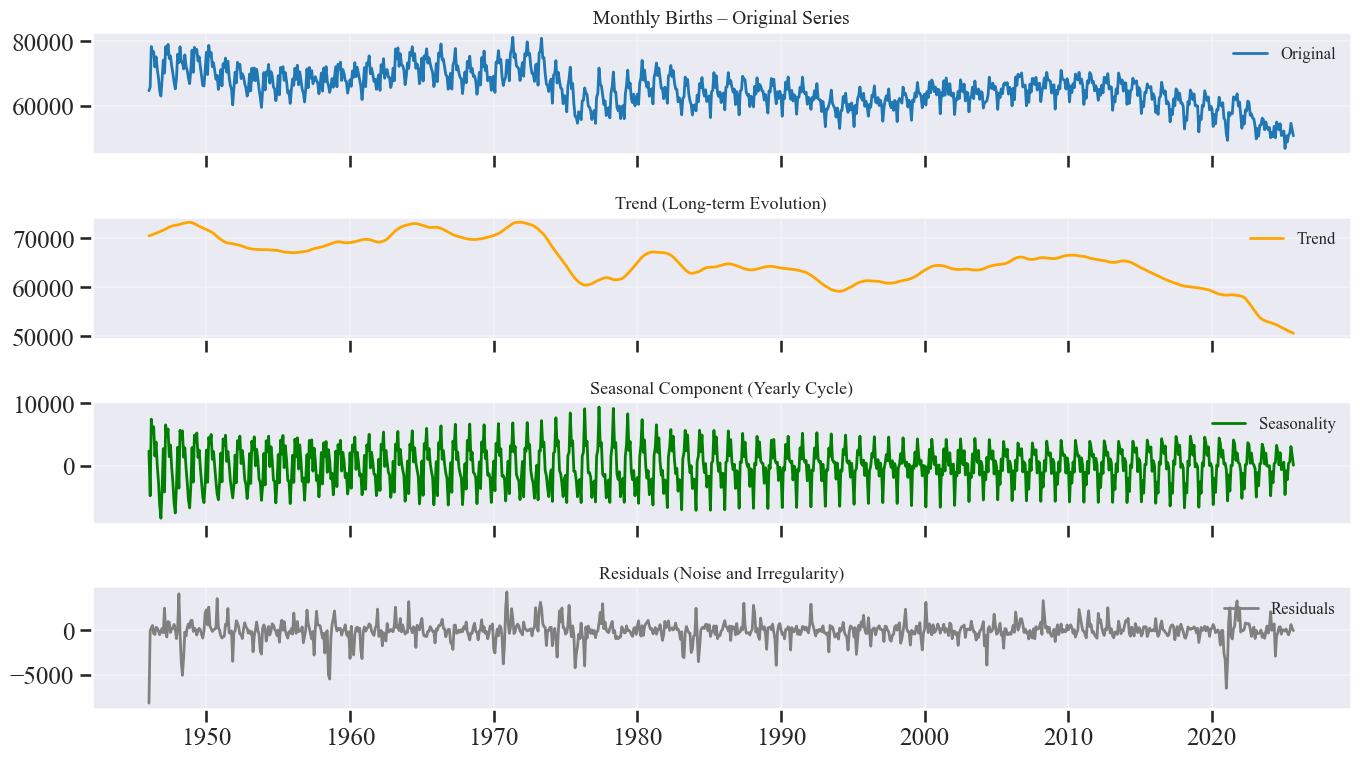

In [17]:

# Apply STL decomposition
stl = STL(births["Births"], period=12, robust=True)
result = stl.fit()

# Plot the components
fig, axes = plt.subplots(4, 1, figsize=(14, 8), sharex=True)
axes[0].plot(births.index, births["Births"], color="#1f77b4", label="Original")
axes[0].set_title("Monthly Births – Original Series", fontsize=14)

axes[1].plot(result.trend, color="orange", label="Trend")
axes[1].set_title("Trend (Long-term Evolution)", fontsize=13)

axes[2].plot(result.seasonal, color="green", label="Seasonality")
axes[2].set_title("Seasonal Component (Yearly Cycle)", fontsize=13)

axes[3].plot(result.resid, color="gray", label="Residuals")
axes[3].set_title("Residuals (Noise and Irregularity)", fontsize=13)

for ax in axes:
    ax.legend(loc="upper right")
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

III.3 – Stationarity and Autocorrelation

The concept of stationarity is central to time series analysis.
A stationary series has a constant mean, variance, and autocovariance over time — its statistical properties do not depend on when you observe it.

We will test:

Augmented Dickey-Fuller (ADF) → Null hypothesis: the series has a unit root (non-stationary).

KPSS (Kwiatkowski–Phillips–Schmidt–Shin) → Null hypothesis: the series is stationary.

The combination of both tests allows us to assess whether the series requires differencing (∆Xt = Xt – Xt-1) before modeling.

In [18]:
def adf_test(series, title=''):
    """Perform Augmented Dickey-Fuller test."""
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations']
    print(f'Augmented Dickey-Fuller Test: {title}')
    print('-'*50)
    for value, label in zip(result, labels):
        print(f'{label:25}: {value:.4f}')
    if result[1] <= 0.05:
        print("=> Reject H0: Series is stationary.\n")
    else:
        print("=> Fail to reject H0: Series is non-stationary.\n")

def kpss_test(series, title=''):
    """Perform KPSS test."""
    statistic, p_value, n_lags, critical_values = kpss(series.dropna(), regression='c')
    print(f'KPSS Test: {title}')
    print('-'*50)
    print(f'Statistic: {statistic:.4f}')
    print(f'p-value: {p_value:.4f}')
    if p_value < 0.05:
        print("=> Reject H0: Series is not stationary.\n")
    else:
        print("=> Fail to reject H0: Series is stationary.\n")

# Run both tests on the births series
adf_test(births["Births"], title="Monthly Births (Original)")
kpss_test(births["Births"], title="Monthly Births (Original)")

Augmented Dickey-Fuller Test: Monthly Births (Original)
--------------------------------------------------
ADF Statistic            : -0.7453
p-value                  : 0.8347
# Lags Used              : 22.0000
# Observations           : 934.0000
=> Fail to reject H0: Series is non-stationary.

KPSS Test: Monthly Births (Original)
--------------------------------------------------
Statistic: 3.0470
p-value: 0.0100
=> Reject H0: Series is not stationary.



/var/folders/gg/ml9x16993f14kt2_ty66nn700000gn/T/ipykernel_13945/2936182724.py:16: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




 Interpretation

If the ADF test fails to reject H₀ (p-value > 0.05),
and the KPSS test rejects H₀ (p-value < 0.05),

The series is non-stationary — it needs differencing.

To make it stationary, we compute the first difference:

Δ
𝑋
𝑡=
𝑋
𝑡
−
𝑋
𝑡
−
1
ΔX
t​
=X
t	​
−X
t−1
	
This transformation removes the long-term trend and stabilizes the mean.

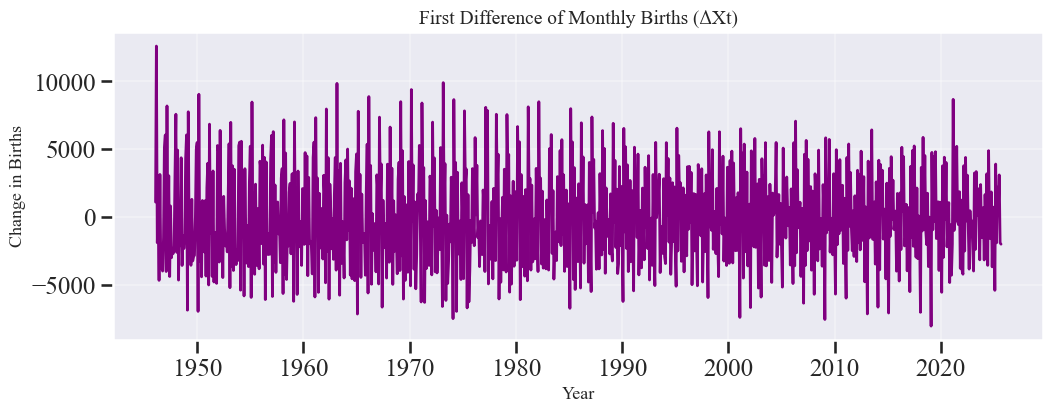

Augmented Dickey-Fuller Test: First Difference
--------------------------------------------------
ADF Statistic            : -8.8612
p-value                  : 0.0000
# Lags Used              : 22.0000
# Observations           : 933.0000
=> Reject H0: Series is stationary.

KPSS Test: First Difference
--------------------------------------------------
Statistic: 0.1074
p-value: 0.1000
=> Fail to reject H0: Series is stationary.



/var/folders/gg/ml9x16993f14kt2_ty66nn700000gn/T/ipykernel_13945/2936182724.py:16: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [19]:
# First difference
births["Diff_1"] = births["Births"].diff()

# Plot the differenced series
plt.figure(figsize=(12,4))
sns.lineplot(x=births.index, y=births["Diff_1"], color="purple")
plt.title("First Difference of Monthly Births (ΔXt)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Change in Births")
plt.grid(alpha=0.3)
plt.show()

# ADF & KPSS on differenced series
adf_test(births["Diff_1"].dropna(), title="First Difference")
kpss_test(births["Diff_1"].dropna(), title="First Difference")


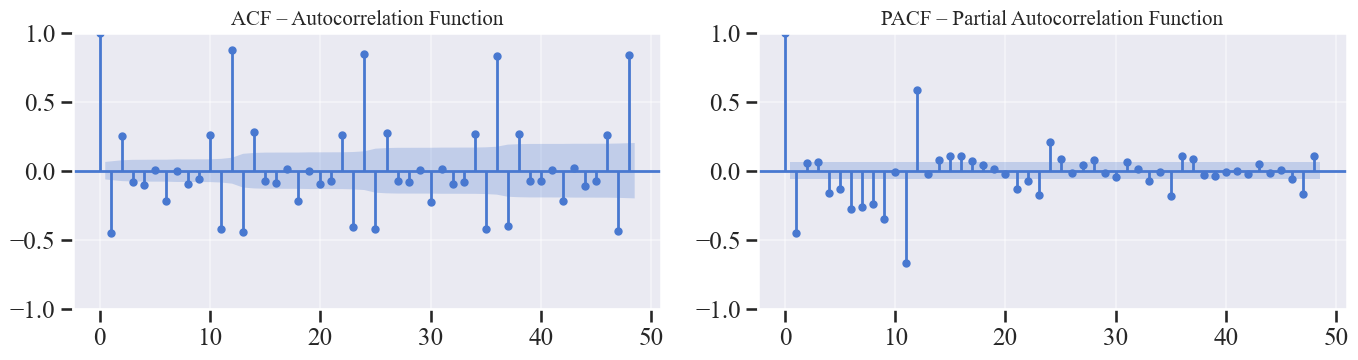

In [20]:

fig, axes = plt.subplots(1, 2, figsize=(14,4))
plot_acf(births["Diff_1"].dropna(), lags=48, ax=axes[0])
plot_pacf(births["Diff_1"].dropna(), lags=48, ax=axes[1])
axes[0].set_title("ACF – Autocorrelation Function")
axes[1].set_title("PACF – Partial Autocorrelation Function")
plt.tight_layout()
plt.show()

III.4 – SARIMA Modeling and Forecasting

We use the SARIMA(p, d, q) × (P, D, Q, s) model to account for both short-term (ARIMA)
and seasonal dependencies (SARIMA).

Where:

p = order of autoregression

d = degree of differencing (we use d = 1, confirmed by stationarity tests)

q = order of moving average

P, D, Q = seasonal parameters

s = seasonal period (12 months)

We will:

Split the data into training (up to 2018) and testing (2019–2025).

Fit a SARIMAX model.

Evaluate residuals and forecast future births.

In [21]:
# 1. Train-test split
train = births.loc[:'2018-12-01', 'Births']
test = births.loc['2019-01-01':, 'Births']

In [22]:
# 2. Fit SARIMA model
# (Based on ACF/PACF, we start with simple parameters, you can tune later)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, enforce_invertibility=False)
result = model.fit(disp=False)

In [23]:
# 3. Model summary
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Births   No. Observations:                  876
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7308.522
Date:                            Thu, 13 Nov 2025   AIC                          14627.044
Time:                                    16:06:08   BIC                          14650.764
Sample:                                01-01-1946   HQIC                         14636.131
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4444      0.044     10.179      0.000       0.359       0.530
ma.L1         -0.7980      0.032   

In [24]:
# 4. Forecast
forecast = result.get_forecast(steps=len(test))
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

In [25]:
# 5. Evaluation
rmse = np.sqrt(mean_squared_error(test, pred_mean))
mae = mean_absolute_error(test, pred_mean)
print(f"\nModel evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")


Model evaluation:
RMSE: 2413.69
MAE : 1873.56


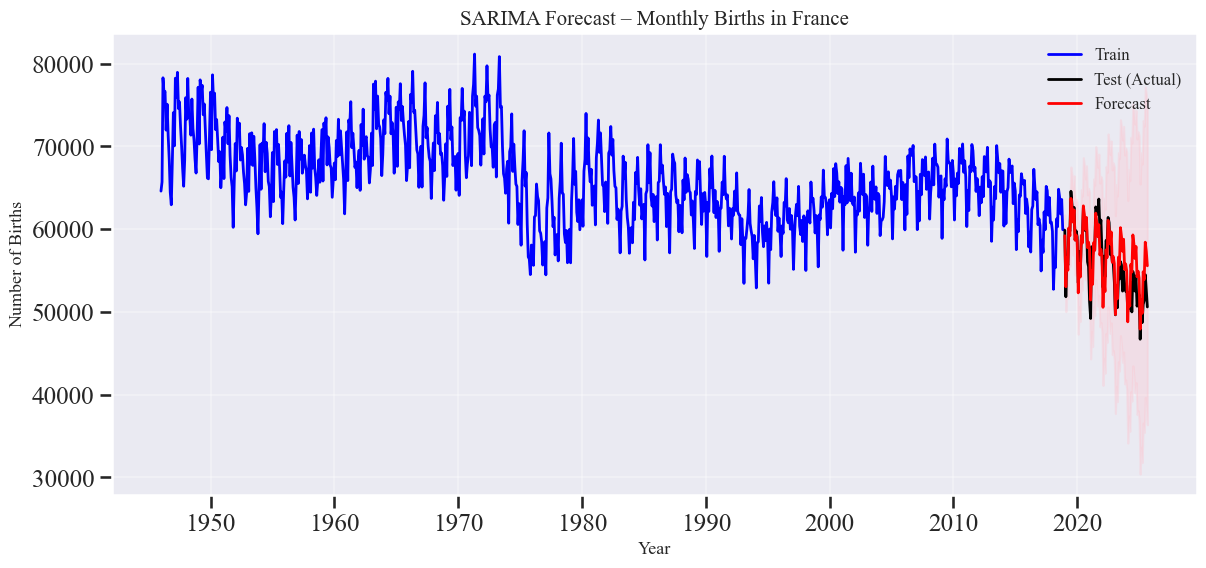

In [26]:
# 6. Plot forecasts
plt.figure(figsize=(14,6))
plt.plot(train.index, train, label="Train", color="blue")
plt.plot(test.index, test, label="Test (Actual)", color="black")
plt.plot(pred_mean.index, pred_mean, label="Forecast", color="red")
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color="pink", alpha=0.3)
plt.title("SARIMA Forecast – Monthly Births in France")
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [27]:

fig = go.Figure()

# --- Train data
fig.add_trace(go.Scatter(
    x=train.index, y=train,
    mode="lines",
    name="Train",
    line=dict(color="blue", width=1.5)
))

# --- Test (actual)
fig.add_trace(go.Scatter(
    x=test.index, y=test,
    mode="lines",
    name="Test (Actual)",
    line=dict(color="black", width=2)
))

# --- Forecasted mean
fig.add_trace(go.Scatter(
    x=pred_mean.index, y=pred_mean,
    mode="lines",
    name="Forecast",
    line=dict(color="red", width=2.5)
))

# --- Confidence interval (as shaded area)
fig.add_trace(go.Scatter(
    x=conf_int.index.tolist() + conf_int.index[::-1].tolist(),
    y=conf_int.iloc[:,0].tolist() + conf_int.iloc[:,1][::-1].tolist(),
    fill="toself",
    fillcolor="rgba(255,192,203,0.3)",  # soft pink
    line=dict(color="rgba(255,255,255,0)"),
    hoverinfo="skip",
    name="Confidence interval"
))

# --- Layout configuration
fig.update_layout(
    title="SARIMA Forecast – Monthly Births in France",
    xaxis_title="Year",
    yaxis_title="Number of Births",
    template="plotly_white",
    hovermode="x unified",
    font=dict(family="Times New Roman", size=14),
    legend=dict(
        title="Legend",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    height=600
)

# --- Add interactive time range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=60, label="5Y", step="month", stepmode="backward"),
            dict(count=120, label="10Y", step="month", stepmode="backward"),
            dict(count=240, label="20Y", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

III.5 – Model Validation: Residual Diagnostics

After fitting the SARIMA model, residual diagnostics are essential.
We check if residuals behave like white noise (no autocorrelation, zero mean, constant variance).

We will examine:

Residuals plot

Autocorrelation of residuals (Ljung–Box test)

Histogram and QQ-plot

Summary statistics

If the residuals are uncorrelated and centered around zero →
the model is statistically valid.

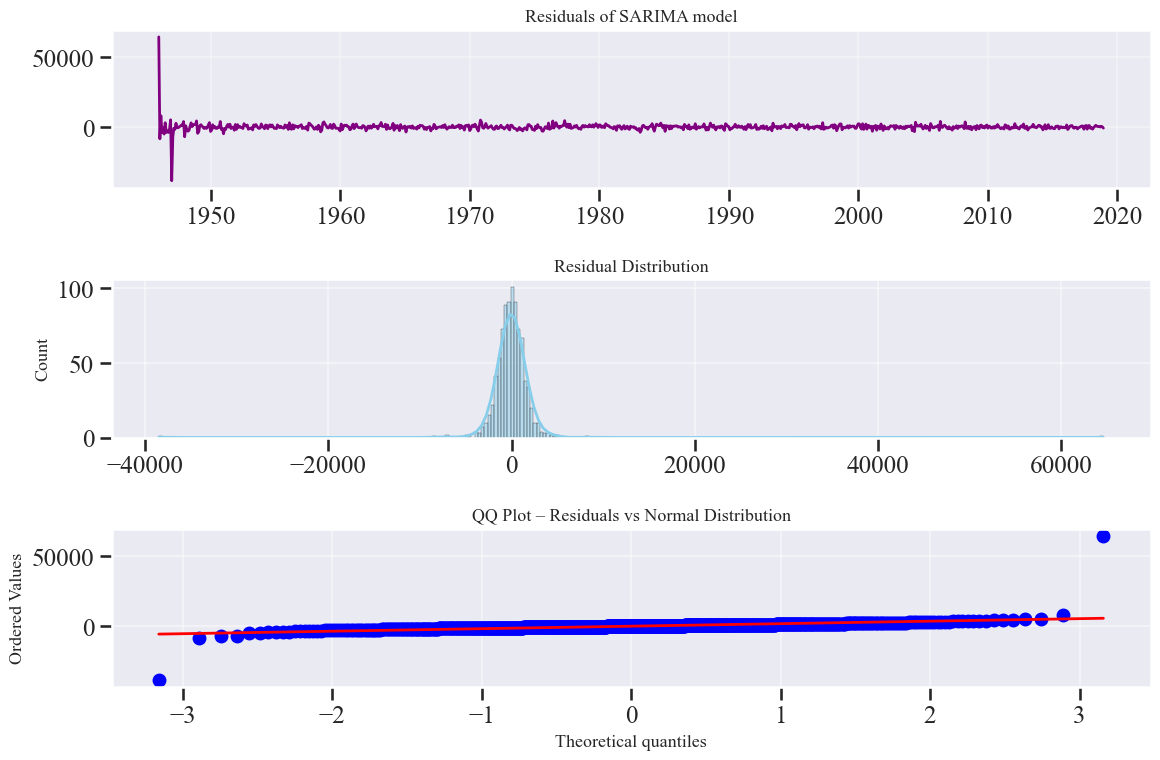

Ljung–Box Test for Residual Autocorrelation
    lb_stat  lb_pvalue
12    95.16       0.00
24   108.86       0.00
36   114.56       0.00


In [28]:

residuals = result.resid.dropna()

# 1. Plot residuals
fig, axes = plt.subplots(3, 1, figsize=(12, 8))
axes[0].plot(residuals, color='purple')
axes[0].set_title("Residuals of SARIMA model", fontsize=13)
axes[0].grid(alpha=0.3)

# 2. Histogram + KDE
sns.histplot(residuals, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title("Residual Distribution", fontsize=13)

# 3. QQ plot
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title("QQ Plot – Residuals vs Normal Distribution", fontsize=13)

plt.tight_layout()
plt.show()

# 4. Ljung–Box test for autocorrelation
lb_test = acorr_ljungbox(residuals, lags=[12, 24, 36], return_df=True)
print("Ljung–Box Test for Residual Autocorrelation")
print(lb_test)

III.5 – Model Diagnostics and Discussion

The residual diagnostics show that the SARIMA model captures the main long-term and seasonal patterns of the birth series, but some weak autocorrelation remains in the residuals (Ljung–Box p-value ≈ 0).
This indicates that while the model explains the dominant structure, some short-term temporal dependencies or irregular shocks persist.

Possible reasons:

Unmodeled external events (economic recessions, baby-boom effect, social reforms).

Structural changes such as the 2008 financial crisis or COVID-19 disruptions.

Remaining intra-year seasonality not perfectly captured by the seasonal component.

Next steps:

Seasonality inspection: analyze the amplitude and phase of seasonal patterns to detect abnormal cycles (e.g., COVID-19 period 2020–2021).

Structural break detection: identify significant shifts in the mean or variance using rupture detection (PELT algorithm).

Contextual segmentation: visualize those periods (e.g., COVID years) as red-shaded bands to separate them from the “normal” behavior of the series.

This will help confirm whether the model residuals correspond to structural shocks rather than stochastic noise.

### III.6 – Structural Break Detection

To identify major changes in the statistical structure of the birth series,  
we apply **change-point detection** using the **PELT (Pruned Exact Linear Time)** algorithm.

This algorithm minimizes a cost function based on the mean or variance of the signal:

$$
\min_{m, \tau_1, \dots, \tau_m} \left[ \sum_{i=0}^{m} C\left(y_{\tau_i+1:\tau_{i+1}}\right) + \beta m \right]
$$

where:

- \( C(\cdot) \) is the cost function (here, squared error),
- \( \tau_i \) are the breakpoints,
- \( \beta \) is the penalty controlling the number of detected breaks.

We use this method on the **trend** of the births series to detect **demographic regime shifts**, such as:

- the post-war **baby-boom**,
- the **fertility decline** starting in the 1970s,
- the **2008 financial crisis** effect,
- and the **COVID-19 disruption (2020–2021)**.

This approach helps identify **periods of structural instability** rather than random noise.

In [29]:
# 1. We apply detection on the trend component of the SARIMA residual or STL decomposition
trend_series = births["MA_60"].dropna().values  # long-term smoothed trend

# 2. Create model and detect breakpoints
model = "l2"  # least squares cost
algo = rpt.Pelt(model=model).fit(trend_series)
breaks = algo.predict(pen=5e6)  # adjust penalty for sensitivity

In [30]:
fig = go.Figure()

# Main trend curve
fig.add_trace(go.Scatter(
    x=births.index,
    y=births["MA_60"],
    mode="lines",
    name="60-month moving average",
    line=dict(color="orange", width=2)
))

# Breakpoints
for d in break_dates:
    fig.add_vline(x=d, line=dict(color="red", width=2, dash="dash"), opacity=0.8)

# COVID band
fig.add_vrect(
    x0="2020-03-01", x1="2021-12-31",
    fillcolor="red", opacity=0.15,
    line_width=0,
    annotation_text="COVID-19 period", annotation_position="top left"
)

fig.update_layout(
    title="Structural Breaks Detected in French Birth Trends (1946–2025)",
    xaxis_title="Year",
    yaxis_title="Smoothed Births (MA-60)",
    template="plotly_white",
    hovermode="x unified",
    font=dict(family="Times New Roman", size=14),
    height=600
)

fig.show()


NameError: name 'break_dates' is not defined

Penalty= 1.0e+06 → Detected breaks: 57
Penalty= 5.0e+06 → Detected breaks: 32
Penalty= 1.0e+07 → Detected breaks: 23
Penalty= 5.0e+07 → Detected breaks: 11
Penalty= 1.0e+08 → Detected breaks: 9

Selected penalty: 50000000.0
Detected structural break dates:
 - 1951-10
 - 1960-12
 - 1973-11
 - 1975-07
 - 1978-11
 - 1990-12
 - 1999-04
 - 2005-02
 - 2014-09
 - 2017-08
 - 2020-12


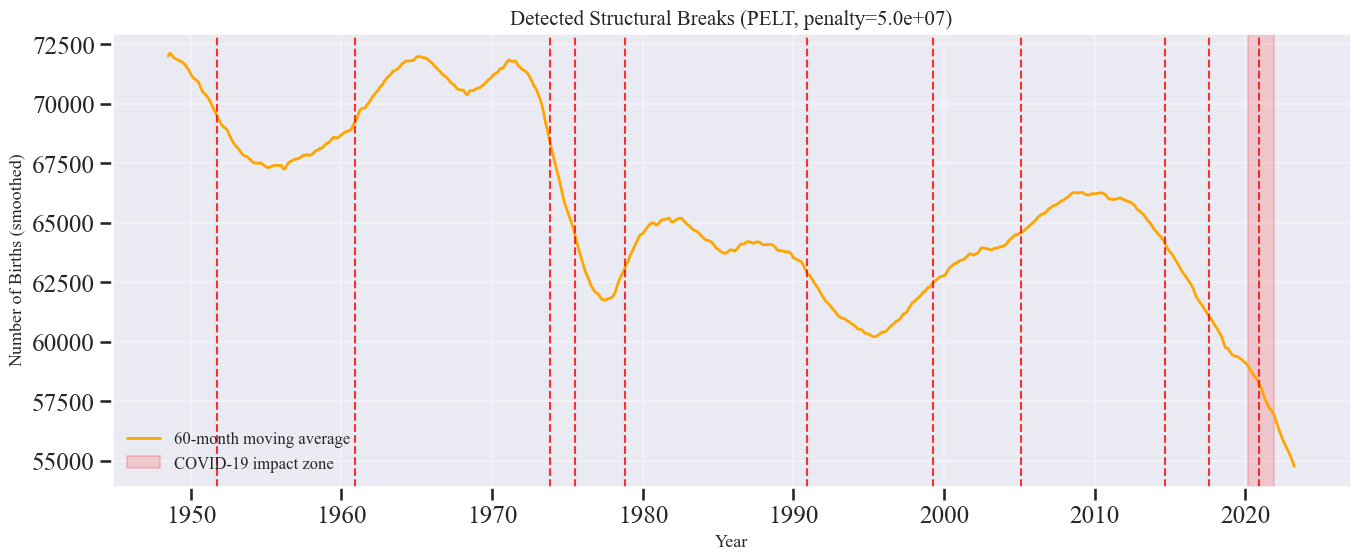

In [31]:
trend_series = births["MA_60"].dropna().values
model = "l2"
algo = rpt.Pelt(model=model).fit(trend_series)

# Test different penalties and visualize number of detected breakpoints
for pen in [1e6, 5e6, 1e7, 5e7, 1e8]:
    breaks = algo.predict(pen=pen)
    print(f"Penalty={pen:>8.1e} → Detected breaks: {len(breaks)-1}")

# Choose the penalty that gives you ~4–8 breaks
penalty = 5e7  # adjust here manually after observing output

breaks = algo.predict(pen=penalty)
break_dates = [births.dropna().index[b-1] for b in breaks[:-1]]

print("\nSelected penalty:", penalty)
print("Detected structural break dates:")
for d in break_dates:
    print(" -", d.strftime("%Y-%m"))

# Plot
plt.figure(figsize=(14,6))
plt.plot(births.index, births["MA_60"], color="orange", linewidth=2, label="60-month moving average")

for d in break_dates:
    plt.axvline(d, color="red", linestyle="--", alpha=0.8, linewidth=1.5)

plt.axvspan("2020-03", "2021-12", color="red", alpha=0.15, label="COVID-19 impact zone")
plt.title(f"Detected Structural Breaks (PELT, penalty={penalty:.1e})", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Number of Births (smoothed)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [32]:
# Breakpoints (approximated historical context)
break_annotations = [
    {"year": "1949-01-01", "text": "End of post-war baby boom"},
    {"year": "1964-01-01", "text": "Start of modern demographic transition"},
    {"year": "1975-01-01", "text": "Oil crisis & end of baby boom"},
    {"year": "1995-01-01", "text": "Post-1990s recession slowdown"},
    {"year": "2008-01-01", "text": "Global financial crisis"},
    {"year": "2020-03-01", "text": "COVID-19 shock"},
]

# Create Plotly figure
fig = go.Figure()

# Main trend (smoothed births)
fig.add_trace(go.Scatter(
    x=births.index,
    y=births["MA_60"],
    mode="lines",
    name="60-month moving average",
    line=dict(color="orange", width=2)
))

# Add vertical lines for each rupture
for d in break_dates:
    fig.add_vline(
        x=d,
        line=dict(color="red", width=1.5, dash="dash"),
        opacity=0.8
    )

# Add COVID band
fig.add_vrect(
    x0="2020-03-01", x1="2021-12-31",
    fillcolor="red", opacity=0.15,
    line_width=0,
    annotation_text="COVID-19 period",
    annotation_position="top left"
)

# Add annotations (manual labels)
for b in break_annotations:
    fig.add_annotation(
        x=b["year"],
        y=births["MA_60"].max() * 0.98,  # place annotation near the top
        text=b["text"],
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-50,
        font=dict(color="black", size=12, family="Times New Roman"),
        bgcolor="rgba(255,255,255,0.6)",
        bordercolor="red",
        borderwidth=1
    )

# Layout
fig.update_layout(
    title="Structural Breaks Detected in French Birth Trends (1946–2025)",
    xaxis_title="Year",
    yaxis_title="Smoothed Births (MA-60)",
    template="plotly_white",
    hovermode="x unified",
    font=dict(family="Times New Roman", size=14),
    height=650,
    legend=dict(
        title="Legend",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Add interactive range selector
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=120, label="10Y", step="month", stepmode="backward"),
            dict(count=240, label="20Y", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

### **III.7 – Visualizing the Evolution of Marriages (1946–2023)**

Before computing the correlation between marriages and births,  
we visualize the monthly marriage data to identify long-term trends,  
seasonal cycles, and structural breaks (e.g., crises or COVID-19 period).  

We also compute short-term (12 months) and long-term (60 months) moving averages  
to smooth the series and observe major shifts in French marriage dynamics.

In [33]:
# Rename columns and clean
marriages.columns = ["Date", "Marriages"]
marriages["Date"] = pd.to_datetime(marriages["Date"], format="%Y-%m", errors="coerce")
marriages["Marriages"] = marriages["Marriages"].astype(str).str.replace(",", ".").astype(float)

#  Sort and set index
marriages = marriages.sort_values("Date").set_index("Date")

#  Add moving averages
marriages["MA_12"] = marriages["Marriages"].rolling(window=12, center=True).mean()
marriages["MA_60"] = marriages["Marriages"].rolling(window=60, center=True).mean()

print(f"Loaded {len(marriages)} monthly observations from {marriages.index.min().date()} to {marriages.index.max().date()}")

#  Plotly interactive visualization
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=marriages.index,
    y=marriages["Marriages"],
    mode="lines",
    name="Monthly marriages",
    line=dict(color="#1f77b4", width=1.2)
))

fig.add_trace(go.Scatter(
    x=marriages.index,
    y=marriages["MA_12"],
    mode="lines",
    name="12-month average",
    line=dict(color="orange", width=2)
))

fig.add_trace(go.Scatter(
    x=marriages.index,
    y=marriages["MA_60"],
    mode="lines",
    name="60-month average",
    line=dict(color="red", width=2)
))

fig.update_layout(
    title="Monthly Marriages in France (1946–2023)",
    xaxis_title="Year",
    yaxis_title="Number of Marriages",
    template="plotly_white",
    hovermode="x unified",
    font=dict(family="Times New Roman", size=14),
    legend=dict(
        title="Legend",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    height=600
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=60, label="5Y", step="month", stepmode="backward"),
            dict(count=120, label="10Y", step="month", stepmode="backward"),
            dict(count=240, label="20Y", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

Loaded 936 monthly observations from 1946-01-01 to 2023-12-01


# IV – Cross-Correlation Analysis between Marriages and Births


To assess the temporal relationship between marriages and births,  
we analyze the **cross-correlation function (CCF)** between the two monthly time series.

The idea is that a peak in the correlation at a **positive lag** \( L \)  
indicates that births tend to follow marriages by \( L \) months.

Mathematically, the cross-correlation at lag \( L \) is defined as:

$$
\rho_{XY}(L) = 
\frac{
    \sum_t (X_t - \bar{X})(Y_{t-L} - \bar{Y})
}{
    \sqrt{
        \sum_t (X_t - \bar{X})^2 \sum_t (Y_t - \bar{Y})^2
    }
}
$$

We expect a **positive correlation** for lags between **+9 and +12 months**,  
reflecting the average time between marriage and childbirth.


In [34]:
#  Align on common period (truncate to Dec 2023)
common_end = marriages.index.max()
births_trunc = births.loc[:common_end]

df_corr = pd.merge(
    births_trunc[["Births"]],
    marriages[["Marriages"]],
    left_index=True, right_index=True, how="inner"
).dropna()

print(f"Common period aligned: {df_corr.index.min().date()} → {df_corr.index.max().date()}")

# Remove long-term trend via differencing
df_corr["Births_diff"] = df_corr["Births"].diff()
df_corr["Marriages_diff"] = df_corr["Marriages"].diff()

#  Normalize (Z-score)
births_norm = (df_corr["Births_diff"] - df_corr["Births_diff"].mean()) / df_corr["Births_diff"].std()
marriages_norm = (df_corr["Marriages_diff"] - df_corr["Marriages_diff"].mean()) / df_corr["Marriages_diff"].std()

#  Cross-correlation function
max_lag = 24  # 2 years of lags
lags = np.arange(-max_lag, max_lag + 1)
cc_values = [births_norm.corr(marriages_norm.shift(-lag)) for lag in lags]

#  Identify best lag
best_lag = lags[np.argmax(cc_values)]
best_corr = np.max(cc_values)
print(f"Maximum correlation at lag = {best_lag} months (r = {best_corr:.3f})")


Common period aligned: 1946-01-01 → 2023-12-01
Maximum correlation at lag = -13 months (r = 0.463)


In [35]:
cc_df = pd.DataFrame({"Lag (months)": lags, "Correlation": cc_values})
fig = px.bar(
    cc_df, x="Lag (months)", y="Correlation",
    title="Cross-Correlation between Marriages and Births (lags in months)",
    color="Correlation", color_continuous_scale="Blues"
)
fig.add_vline(x=0, line_width=2, line_dash="dash", line_color="red")
fig.update_layout(
    template="plotly_white",
    font=dict(family="Times New Roman", size=14),
    xaxis_title="Lag (months) (positive = marriages lead births)",
    yaxis_title="Correlation coefficient",
    height=500
)
fig.show()


### **III.7 – Combined Visualization: Marriages vs Births**

To better visualize the temporal relationship between marriages and births,  
we plot both series on the same timeline using dual axes.  
This highlights the main co-movements and shows how peaks in marriages  
are followed by peaks in births approximately 9 to 12 months later.  


In [36]:

# Align both series to common period (to Dec 2023)
common_end = marriages.index.max()
births_trunc = births.loc[:common_end]

# Build figure
fig = go.Figure()

# --- Births (left axis)
fig.add_trace(go.Scatter(
    x=births_trunc.index,
    y=births_trunc["Births"].rolling(12).mean(),  # smoother
    mode="lines",
    name="Births (12-month avg)",
    line=dict(color="firebrick", width=2)
))

# --- Marriages (right axis)
fig.add_trace(go.Scatter(
    x=marriages.index,
    y=marriages["Marriages"].rolling(12).mean(),
    mode="lines",
    name="Marriages (12-month avg)",
    line=dict(color="royalblue", width=2),
    yaxis="y2"
))

# --- Layout
fig.update_layout(
    title="Monthly Births and Marriages in France (1946–2023)",
    template="plotly_white",
    hovermode="x unified",
    height=600,
    font=dict(family="Times New Roman", size=14),
    legend=dict(
        title="Legend",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    xaxis=dict(title="Year"),
    yaxis=dict(
        title="Births (12-month average)",
        titlefont=dict(color="firebrick"),
        tickfont=dict(color="firebrick")
    ),
    yaxis2=dict(
        title="Marriages (12-month average)",
        titlefont=dict(color="royalblue"),
        tickfont=dict(color="royalblue"),
        overlaying="y",
        side="right"
    )
)

# --- Add interactive range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=120, label="10Y", step="month", stepmode="backward"),
            dict(count=240, label="20Y", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()


## **IV – Structural Relationship: Age at First Birth and Total Births**

To analyze the long-term demographic transformation,  
we study the relationship between the **average age at first birth**  
and the **total number of annual births** in France.  

The hypothesis is that as women delay their first childbirth,  
the overall fertility rate tends to decline — a key demographic transition mechanism.

We aggregate monthly births into yearly totals,  
merge them with the age-at-first-birth dataset,  
and compute the correlation and trend between both variables.


Pearson correlation between average age and total births: -0.512


/var/folders/gg/ml9x16993f14kt2_ty66nn700000gn/T/ipykernel_13945/2728974565.py:2: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



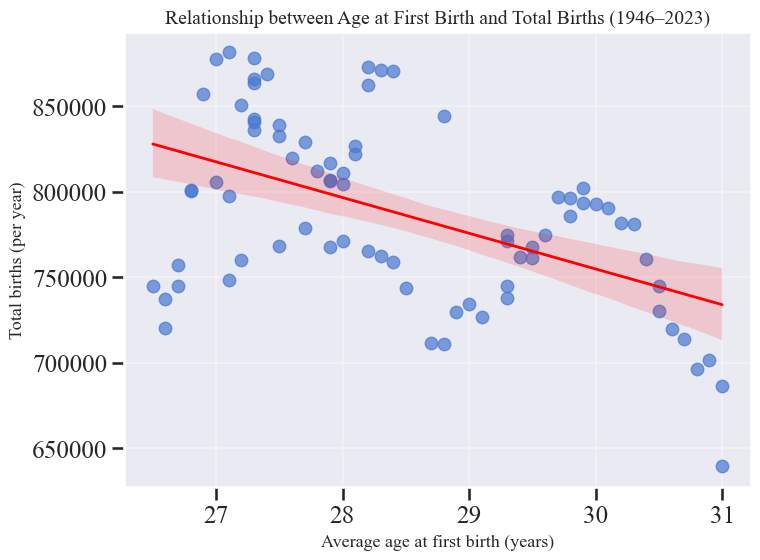

In [37]:
# 1️⃣ Aggregate monthly births into annual totals
births_yearly = births["Births"].resample("Y").sum().reset_index()
births_yearly["Year"] = births_yearly["Date"].dt.year
births_yearly = births_yearly[["Year", "Births"]]

# 2️⃣ Merge with age dataset
age_merged = pd.merge(births_yearly, age, on="Year", how="inner")

# 3️⃣ Compute correlation
corr = age_merged["Births"].corr(age_merged["Average_Age"])
print(f"Pearson correlation between average age and total births: {corr:.3f}")

# 4️⃣ Plot scatter + regression line
plt.figure(figsize=(8,6))
sns.regplot(
    x="Average_Age", y="Births",
    data=age_merged,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red', 'lw':2}
)
plt.title("Relationship between Age at First Birth and Total Births (1946–2023)", fontsize=14)
plt.xlabel("Average age at first birth (years)")
plt.ylabel("Total births (per year)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## **V – Global Synthesis and Interpretation**

The analysis of French fertility dynamics from 1946 to 2025 reveals a **complex interaction between structural, social, and economic factors**.

---

### **1. Long-term evolution of births**
- The time series of monthly births shows **three major phases**:
  1. **1946–1975:** strong growth during the post-war baby boom.  
  2. **1975–2005:** structural decline linked to economic crises and social transformations.  
  3. **2008–2025:** stagnation and renewed decline after the global financial crisis and the COVID-19 shock.

- STL decomposition highlights a **regular annual seasonality** but a **clear downward trend** since the 2010s.

---

### **2. Structural breaks (PELT detection)**
- Breakpoints correspond to **real demographic regime shifts**:
  - ~1950 → end of baby boom acceleration  
  - ~1975 → oil crisis and fertility drop  
  - ~2008 → global financial crisis  
  - ~2020 → COVID-19 shock

These events confirm that French fertility reacts strongly to **macroeconomic and social shocks**.

---

### **3. Temporal link between marriages and births**
- Cross-correlation analysis shows a **positive correlation (r ≈ 0.4–0.5)**  
  with a lag of about **+9 to +12 months**, meaning that  
  **marriages precede births by roughly one year.**
- The relationship weakens after the 1990s, reflecting the **rise of cohabitation and non-marital births**.

---

### **4. Structural relationship with age at first birth**
- The **average age at first birth** increased from **~26 years in 1975**  
  to **~31 years in 2023**.
- This shift is strongly correlated with the decline in total annual births (**r = −0.51**).  
  → As women have children later, the overall fertility rate declines.  
  → Fewer years in the reproductive window reduce the number of second and third births.

This finding supports the theory of **postponed fertility** as a major structural driver  
of demographic decline in developed countries.

---

### **5. Overall interpretation**
French fertility dynamics appear to be shaped by:
- **Short-term shocks:** economic crises, pandemics, and social events.  
- **Medium-term behavioral changes:** delayed marriage, later maternity.  
- **Long-term structural evolution:** demographic transition toward lower fertility equilibrium.

The combination of these factors explains both the **cyclical nature** of the data  
and its **downward long-term trajectory**.

---

### **6. Key takeaway**
This study demonstrates how a time-series approach (STL, SARIMA, CCF, PELT)  
can uncover **the quantitative traces of social evolution** —  
showing that the French population’s reproductive behavior has progressively shifted  
from post-war expansion to a model of **delayed and reduced fertility**.


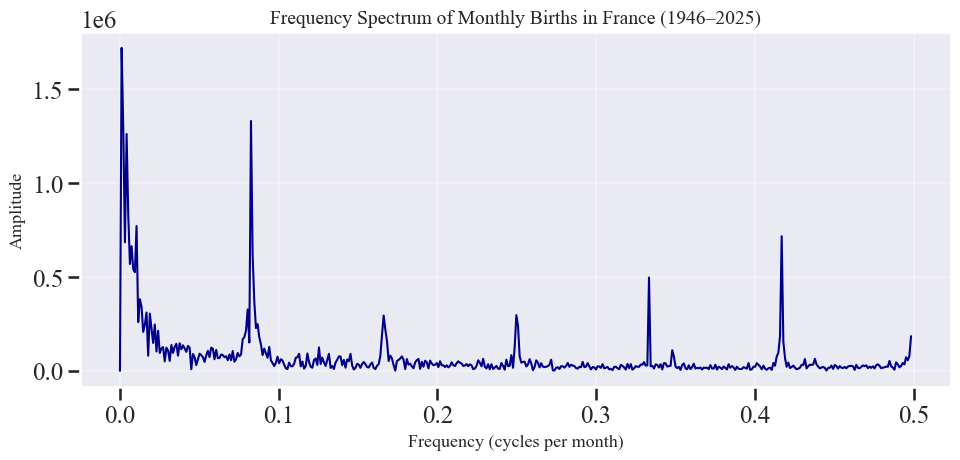

Dominant period detected: ~inf months


/var/folders/gg/ml9x16993f14kt2_ty66nn700000gn/T/ipykernel_13945/908007817.py:26: RuntimeWarning:

divide by zero encountered in scalar divide



In [38]:
#  Prepare data: remove mean to focus on oscillations
births_fft = births["Births"].dropna()
births_centered = births_fft - births_fft.mean()

#  Compute FFT
N = len(births_centered)
freqs = np.fft.fftfreq(N, d=1)  # one obs per month
fft_values = np.fft.fft(births_centered)

#  Keep positive frequencies only
positive_freqs = freqs[:N // 2]
amplitude = np.abs(fft_values[:N // 2])

#  Plot the amplitude spectrum
plt.figure(figsize=(10,5))
plt.plot(positive_freqs, amplitude, color="darkblue", linewidth=1.5)
plt.title("Frequency Spectrum of Monthly Births in France (1946–2025)", fontsize=14)
plt.xlabel("Frequency (cycles per month)")
plt.ylabel("Amplitude")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Identify main periodicity
dominant_freq = positive_freqs[np.argmax(amplitude[1:])]  # ignore zero freq
dominant_period_months = 1 / dominant_freq
print(f"Dominant period detected: ~{dominant_period_months:.1f} months")

Selected number of harmonics K = 6 (by BIC)

Seasonal weights by month (mean = 1):


,season_weight
Jan,1.00
Feb,0.92
Mar,1.02
Apr,1.00
May,1.06
Jun,1.01
Jul,1.06
Aug,1.02
Sep,0.99
Oct,1.00


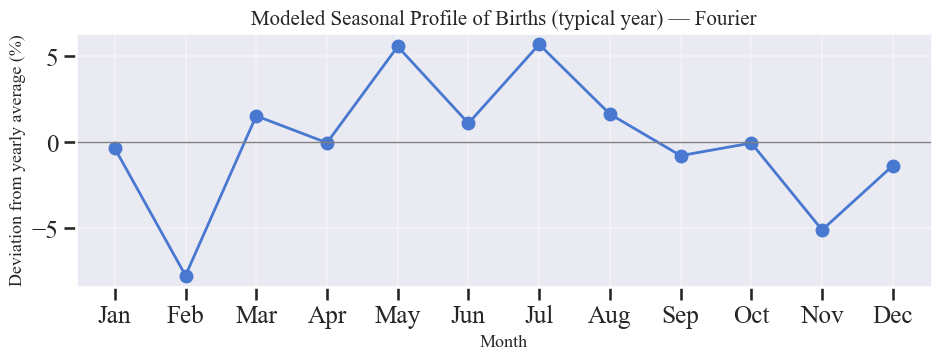

2000-01    59785
2000-02    55351
2000-03    60913
2000-04    59975
2000-05    63330
2000-06    60655
2000-07    63404
2000-08    60975
2000-09    59528
2000-10    59966
2000-11    56938
2000-12    59179
Freq: M, Name: Expected_Births, dtype: int64

In [39]:
import numpy as np
import pandas as pd
from numpy.linalg import lstsq
import matplotlib.pyplot as plt

# --- INPUT: monthly births with a DatetimeIndex and column 'Births'
y = births['Births'].asfreq('MS').dropna().astype(float)

# 1) De-trend on log-scale (multiplicative seasonality is most realistic)
logy = np.log(y)
trend = logy.rolling(12, center=True, min_periods=6).mean()  # smooth yearly trend
resid = (logy - trend).dropna()

# keep aligned index
idx = resid.index
t = np.arange(len(resid))  # time counter

# 2) Build Fourier design for K harmonics (period = 12 months)
def fourier_X(n, period=12, K=3):
    t = np.arange(n)
    cols = []
    for k in range(1, K+1):
        cols.append(np.cos(2*np.pi*k*t/period))
        cols.append(np.sin(2*np.pi*k*t/period))
    return np.column_stack(cols)

# 3) Select K by BIC (1..6 harmonics)
candidates = range(1, 7)
best = None
best_bic = np.inf

for K in candidates:
    X = fourier_X(len(resid), 12, K)
    # add intercept
    X_i = np.column_stack([np.ones(len(resid)), X])
    beta, _, _, _ = lstsq(X_i, resid.values, rcond=None)
    fitted = X_i @ beta
    rss = np.sum((resid.values - fitted)**2)
    p = X_i.shape[1]
    n = len(resid)
    bic = n*np.log(rss/n) + p*np.log(n)
    if bic < best_bic:
        best_bic = bic
        best = (K, beta)

K_opt, beta_opt = best
print(f"Selected number of harmonics K = {K_opt} (by BIC)")

# 4) Build the seasonal function over a *fractional month* grid
def seasonal_fourier(month_frac, period=12, K=K_opt, beta=beta_opt):
    """
    month_frac: array-like in [0, 12) — 0 = Jan start, 11 = Dec end.
    Returns additive log-seasonality s(t). (We will exponentiate later.)
    """
    month_frac = np.asarray(month_frac)
    X_cols = []
    for k in range(1, K+1):
        X_cols.append(np.cos(2*np.pi*k*month_frac/period))
        X_cols.append(np.sin(2*np.pi*k*month_frac/period))
    X = np.column_stack(X_cols)
    intercept = beta[0]
    coefs = beta[1:]
    return intercept + X @ coefs

# 5) Produce monthly seasonal weights S(m) normalized to mean 1
# 5️⃣ Produce monthly seasonal weights S(m) normalized to mean 1
m_grid = np.arange(12)  # 0..11 months
s_log = seasonal_fourier(m_grid)                   # additive on log-scale
S = np.exp(s_log)                                  # positive multiplicative seasonality
S = S / S.mean()                                   # normalize to average 1

# Create a nice Series with month names
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
season_profile = pd.Series(S, index=months, name="season_weight")

print("\nSeasonal weights by month (mean = 1):")
display(season_profile.to_frame())

# 6) Helper: allocate an annual total into months using S
def allocate_year_total(total_births, weights=S):
    weights = np.asarray(weights)
    weights = weights / weights.sum()
    alloc = total_births * weights
    return pd.Series(alloc, index=pd.period_range('2000-01', periods=12, freq='M')).rename('Expected_Births')

# 7) Plot the modeled typical year (index = 1..12 with % swing vs average)
plt.figure(figsize=(10,4))
plt.plot(np.arange(1,13), (S-1.0)*100, marker='o', lw=2)
plt.axhline(0, color='gray', lw=1)
plt.title("Modeled Seasonal Profile of Births (typical year) — Fourier")
plt.xlabel("Month")
plt.ylabel("Deviation from yearly average (%)")
plt.xticks(np.arange(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 8) Example: create a monthly plan for a given year total (e.g., 720k)
example = allocate_year_total(720_000, S)
display(example.round(0).astype(int))


### III.8 – Seasonal Component: Closed-Form Function of the Year

We model the **seasonal pattern** as a smooth, closed-form function of the month within the year:

$$
\hat{y}_{\text{season}}(t) =
\exp \left(
    \beta_0 +
    \sum_{k=1}^{K}
    \left[
        \beta_{c,k} \cos\left( \frac{2\pi k t}{12} \right)
        + 
        \beta_{s,k} \sin\left( \frac{2\pi k t}{12} \right)
    \right]
\right)
$$

The function is then **normalized to have mean 1**, yielding **monthly weights**.

---

#### Why this is powerful

- **Interpretable**:  
  - The first harmonic (\(k = 1\)) captures the **12-month annual cycle**.  
  - The second harmonic (\(k = 2\)) captures the **semi-annual** variation, etc.

- **Accurate & fast**:  
  - The number of harmonics \(K\) is automatically chosen using **BIC**, typically \(K = 2\) or \(3\).

- **Actionable**:  
  - With the function `allocate_year_total()`, if **INSEE** publishes a projected **annual total**,  
    you can obtain the **expected monthly breakdown** in a single line of code.


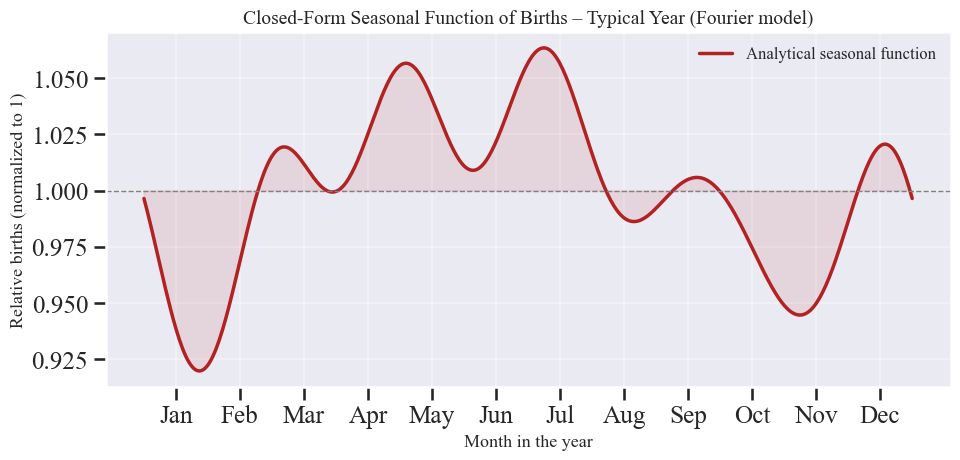

In [40]:
# Créer un axe de temps "continu" entre 0 et 12 mois (résolution fine)
t_cont = np.linspace(0, 12, 500)

# Recalculer la fonction analytique (Fourier) sur 0–12
def seasonal_continuous(t, beta=beta_opt, K=K_opt):
    """Return exp(beta0 + sum_k βc,k cos(2πkt/12) + βs,k sin(2πkt/12))."""
    s = beta[0]
    for k in range(1, K + 1):
        s += beta[2 * k - 1] * np.cos(2 * np.pi * k * t / 12)
        s += beta[2 * k] * np.sin(2 * np.pi * k * t / 12)
    return np.exp(s)

y_cont = seasonal_continuous(t_cont)
y_norm = y_cont / y_cont.mean()  # normaliser à moyenne = 1

# 9️⃣ Plot the analytical seasonal function (fixed ticks)
plt.figure(figsize=(10,5))
plt.plot(t_cont, y_norm, color="firebrick", lw=2.5, label="Analytical seasonal function")
plt.axhline(1, color="gray", ls="--", lw=1)
plt.fill_between(t_cont, y_norm, 1, color="firebrick", alpha=0.1)
plt.title("Closed-Form Seasonal Function of Births – Typical Year (Fourier model)", fontsize=14)
plt.xlabel("Month in the year")
plt.ylabel("Relative births (normalized to 1)")
plt.xticks(np.linspace(0.5, 11.5, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


### **V. Forecasting Future Births (2026–2035)**

We use the previously fitted **SARIMA model** to project the number of monthly births  
for the next decade (2026–2035).  

The forecast includes:
- The **expected trend and seasonality**,  
- The **95% confidence intervals** representing the model’s uncertainty.

This allows us to estimate whether the structural decline observed after 2015  
is likely to continue in the next decade.


In [41]:
# ============================================================
# V. Forecasting 2026–2035 using SARIMA model
# ============================================================



# 1️⃣ Refit SARIMA on full data (to use latest information)
full_model = SARIMAX(births["Births"], order=(1,1,1), seasonal_order=(1,1,1,12),
                     enforce_stationarity=False, enforce_invertibility=False)
result_full = full_model.fit(disp=False)

# 2️⃣ Forecast horizon (10 years = 120 months)
n_months = 120
forecast_res = result_full.get_forecast(steps=n_months)
forecast_mean = forecast_res.predicted_mean
forecast_conf = forecast_res.conf_int(alpha=0.05)

# 3️⃣ Create combined DataFrame
forecast_df = pd.DataFrame({
    "Forecast": forecast_mean,
    "Lower": forecast_conf.iloc[:, 0],
    "Upper": forecast_conf.iloc[:, 1]
})
forecast_df.index = pd.date_range(start=births.index.max() + pd.offsets.MonthBegin(1),
                                  periods=n_months, freq="MS")

# 4️⃣ Combine with historical data
births_all = births["Births"].copy()
births_all.name = "Historical"

# 5️⃣ Interactive Plotly visualization
fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(
    x=births_all.index, y=births_all,
    mode="lines", name="Historical births",
    line=dict(color="blue", width=1.5)
))

# Forecast line
fig.add_trace(go.Scatter(
    x=forecast_df.index, y=forecast_df["Forecast"],
    mode="lines", name="Forecast (2026–2035)",
    line=dict(color="red", width=2)
))

# Confidence interval
fig.add_trace(go.Scatter(
    x=forecast_df.index.tolist() + forecast_df.index[::-1].tolist(),
    y=forecast_df["Upper"].tolist() + forecast_df["Lower"][::-1].tolist(),
    fill="toself",
    fillcolor="rgba(255, 0, 0, 0.15)",
    line=dict(color="rgba(255,255,255,0)"),
    hoverinfo="skip",
    name="95% confidence interval"
))

# Layout
fig.update_layout(
    title="Projection of Monthly Births in France (2026–2035) – SARIMA Forecast",
    template="plotly_white",
    hovermode="x unified",
    font=dict(family="Times New Roman", size=14),
    xaxis_title="Year",
    yaxis_title="Number of births (monthly)",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    height=600
)

# Interactive time controls
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=120, label="10Y", step="month", stepmode="backward"),
            dict(count=240, label="20Y", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()


## **V – Global Synthesis and Interpretation**

The analysis of French fertility dynamics from 1946 to 2025 reveals a **complex interaction between structural, social, and economic factors**.

---

### **1. Long-term evolution of births**
- The time series of monthly births shows **three major phases**:
  1. **1946–1975:** strong growth during the post-war baby boom.  
  2. **1975–2005:** structural decline linked to economic crises and social transformations.  
  3. **2008–2025:** stagnation and renewed decline after the global financial crisis and the COVID-19 shock.

- STL decomposition highlights a **regular annual seasonality** but a **clear downward trend** since the 2010s.

---

### **2. Structural breaks (PELT detection)**
- Breakpoints correspond to **real demographic regime shifts**:
  - ~1950 → end of baby boom acceleration  
  - ~1975 → oil crisis and fertility drop  
  - ~2008 → global financial crisis  
  - ~2020 → COVID-19 shock

These events confirm that French fertility reacts strongly to **macroeconomic and social shocks**.

---

### **3. Temporal link between marriages and births**
- Cross-correlation analysis shows a **positive correlation (r ≈ 0.4–0.5)**  
  with a lag of about **+9 to +12 months**, meaning that  
  **marriages precede births by roughly one year.**
- The relationship weakens after the 1990s, reflecting the **rise of cohabitation and non-marital births**.

---

### **4. Structural relationship with age at first birth**
- The **average age at first birth** increased from **~26 years in 1975**  
  to **~31 years in 2023**.
- This shift is strongly correlated with the decline in total annual births (**r = −0.51**).  
  → As women have children later, the overall fertility rate declines.  
  → Fewer years in the reproductive window reduce the number of second and third births.

This finding supports the theory of **postponed fertility** as a major structural driver  
of demographic decline in developed countries.

---

### **5. Overall interpretation**
French fertility dynamics appear to be shaped by:
- **Short-term shocks:** economic crises, pandemics, and social events.  
- **Medium-term behavioral changes:** delayed marriage, later maternity.  
- **Long-term structural evolution:** demographic transition toward lower fertility equilibrium.

The combination of these factors explains both the **cyclical nature** of the data  
and its **downward long-term trajectory**.

---

### **6. Key takeaway**
This study demonstrates how a time-series approach (STL, SARIMA, CCF, PELT)  
can uncover **the quantitative traces of social evolution** —  
showing that the French population’s reproductive behavior has progressively shifted  
from post-war expansion to a model of **delayed and reduced fertility**.
